# Analyse des Méthodes de Vente de Pens et Printers

**Les questions principales qui guident notre analyse dans ce notebook sont les suivantes :** 

1. Quelle méthode de vente génère le plus de revenus ? 
2. Comment la fréquence des visites sur le site web des clients influence-t-elle les revenus ? 
3. Les années en tant que client affectent-elles les revenus générés par les différentes méthodes de vente ?

---

## Étapes du notebook

1. **Charger les données et validation des données**
2. **Visualiser les valeurs manquantes**
3. **Visualisation des données**
4. **Tests statistiques**


####  1 Charger les données et Validation des données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import missingno as msno

# Configuration des styles de Seaborn
sns.set(style="whitegrid")

In [2]:
data=pd.read_csv("C:/Users/KRISTIAN/Desktop/Cy cergy pontoise/Analyse a faire/projet data analyste professionel/product.csv")

In [3]:
# visualiser les 5 premières ligne de ma base de donnée
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
# Calculer les statistiques descriptives
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [7]:
# Vérifier si les données ont des doublons
data.duplicated().sum()

0

In [8]:
# visualisation des données de week
data['week'].value_counts().sort_index()

week
1    3721
2    2491
3    2411
4    2575
5    2574
6    1228
Name: count, dtype: int64

In [9]:
data['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [10]:
# Remplacer les valeurs 'em + call' en 'Email + Call' et 'email' en 'Email'
data['sales_method']=data['sales_method'].replace("em + call","Email + Call")
data['sales_method']=data['sales_method'].replace("email","Email")

In [11]:
data['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [12]:
data['customer_id'].nunique()

15000

In [13]:
data['nb_sold'].unique()

array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16], dtype=int64)

In [14]:
data['revenue'].unique()

array([   nan, 225.47,  52.55, ...,  44.34,  45.01,  64.9 ])

In [15]:
np.sort(data['years_as_customer'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 47, 63], dtype=int64)

**L'entreprise a été créée en 1984, donc le maximum des années devrait être de 40 ans. Les années supérieures à 40 ans sont donc des valeurs aberrantes.**

In [16]:
no_outlier=data['years_as_customer']<=40

In [17]:
# Suprimer les valeurs aberante
data=data[no_outlier]

In [18]:
data['nb_site_visits'].unique()

array([24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29, 20, 18, 19, 35, 16,
       17, 33, 36, 34, 15, 37, 14, 13, 12, 41], dtype=int64)

In [19]:
data["state"].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

**Toutes les colonnes correspondent à ce qui a été indiqué dans la description**

## 2. Visualiser les valeurs manquantes

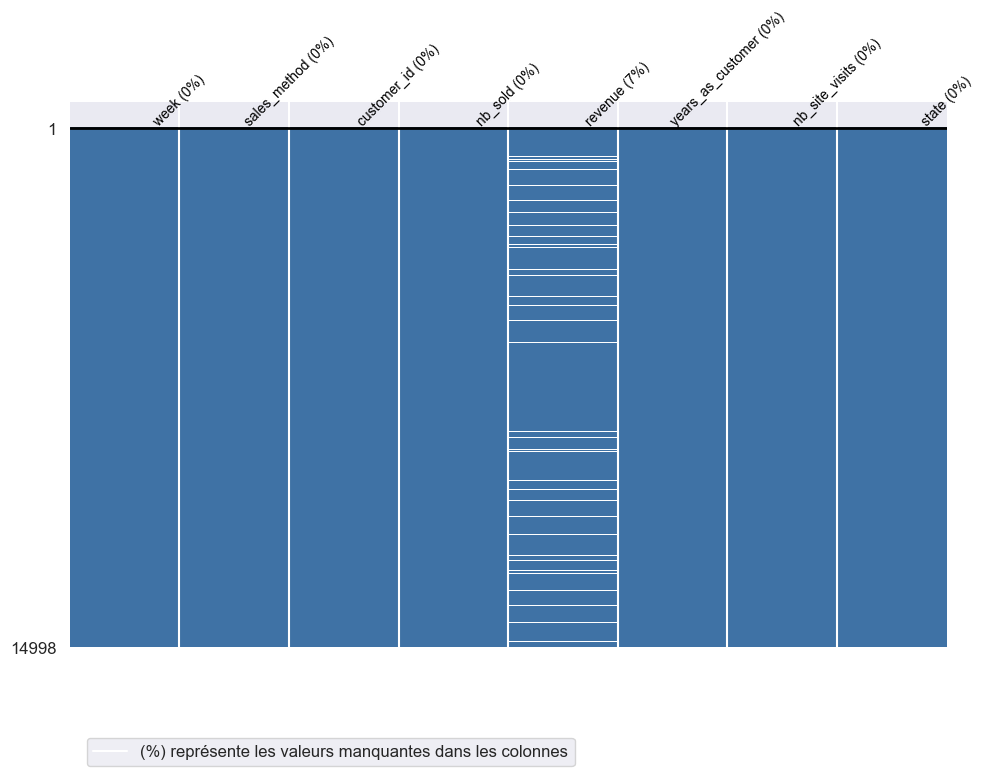

In [20]:

# Définir le style Seaborn
sns.set(style='darkgrid')

# Visualiser les données manquantes avec personnalisation
fig, ax = plt.subplots(figsize=(10, 8))
msno.matrix(data, ax=ax, fontsize=10, sparkline=False, color=(0.25, 0.45, 0.65), labels=True)

# Calculer les pourcentages de valeurs manquantes par colonne
missing_percent = data.isnull().mean() * 100

# Supprimer les étiquettes de l'axe des x
ax.set_xticks([])

# Ajouter des annotations manuelles pour chaque étiquette au centre des barres correspondantes
for i, col in enumerate(data.columns):
    xpos = i + 0.5  # Centrer le texte au milieu de la barre
    ypos = -0.8  # Ajuster la position verticale des annotations
    ax.text(xpos, ypos, f"{col} ({missing_percent[col]:.0f}%)", rotation=45, ha='center', va='bottom', fontsize=10, color='black')

# Ajuster la position de la ligne sous le graphique
plt.axhline(y=-1, xmin=0, xmax=1, color='black', linestyle='-', linewidth=2)

# Ajouter une légende pour indiquer que le pourcentage représente les valeurs manquantes
plt.legend(['(%) représente les valeurs manquantes dans les colonnes'], loc='upper left', bbox_to_anchor=(0.01, -0.15), fontsize=12)

# Ajuster l'espacement pour une meilleure apparence visuelle
plt.tight_layout()

# Afficher le graphique
plt.show()


1. Pourcentage de valeurs manquantes par colonne :
   - La colonne "revenue" a 7% de valeurs manquantes.
   - Toutes les autres colonnes n'ont aucune valeur manquante, soit 0% de données manquantes.


En résumé, ce graphique montre que les données sont globalement de très bonne qualité, avec une seule colonne ("revenue") ayant un faible pourcentage de valeurs manquantes. Le reste du jeu de données est parfaitement complet, ce qui en fait une base solide pour une analyse approfondie.

In [21]:
# Remplacon les valeurs manquantes dans la colonne revenue par la médiane des valeurs non manquantes
data['revenue'].fillna(data['revenue'].median(), inplace=True)

## 3 Visualisation des données

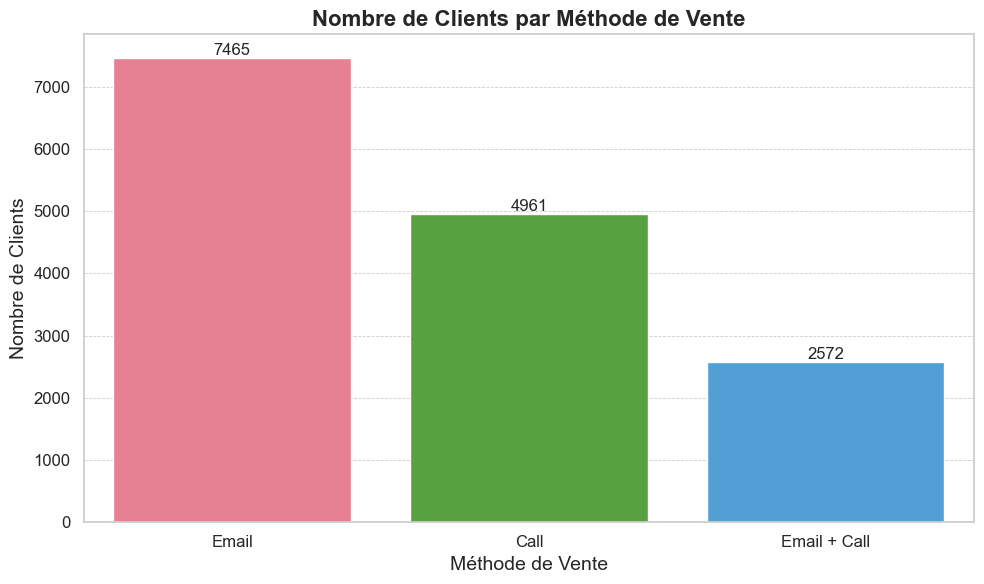

In [22]:
# Nombre de clients pour chaque approche
clients_per_method = data['sales_method'].value_counts().reset_index()
clients_per_method.columns = ['sales_method', 'client_count']

# Configuration des styles de Seaborn
sns.set(style="whitegrid")

# Créer le diagramme en barres
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='sales_method', y='client_count', hue='sales_method', data=clients_per_method, palette="husl", dodge=False, legend=False)

# Ajoutons le titre et les labels avec polices améliorées
plt.title('Nombre de Clients par Méthode de Vente', fontsize=16, weight='bold')
plt.xlabel('Méthode de Vente', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)

# Ajoutons des ticks améliorés
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Affichons les valeurs sur les barres
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge', fontsize=12)

# Améliorons les bordures et la grille
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')

# Ajuster le layout
plt.tight_layout()

#plt.savefig('1.png')
# Afficher le graphique
plt.show()

La méthode de vente par email est la plus répandue, suivie par la méthode d'appel téléphonique. La combinaison des deux est utilisée par un nombre plus restreint de clients.
Ces données indiquent que l'email est la méthode de vente privilégiée par la majorité des clients, avec l'appel téléphonique comme méthode complémentaire pour une partie d'entre eux.

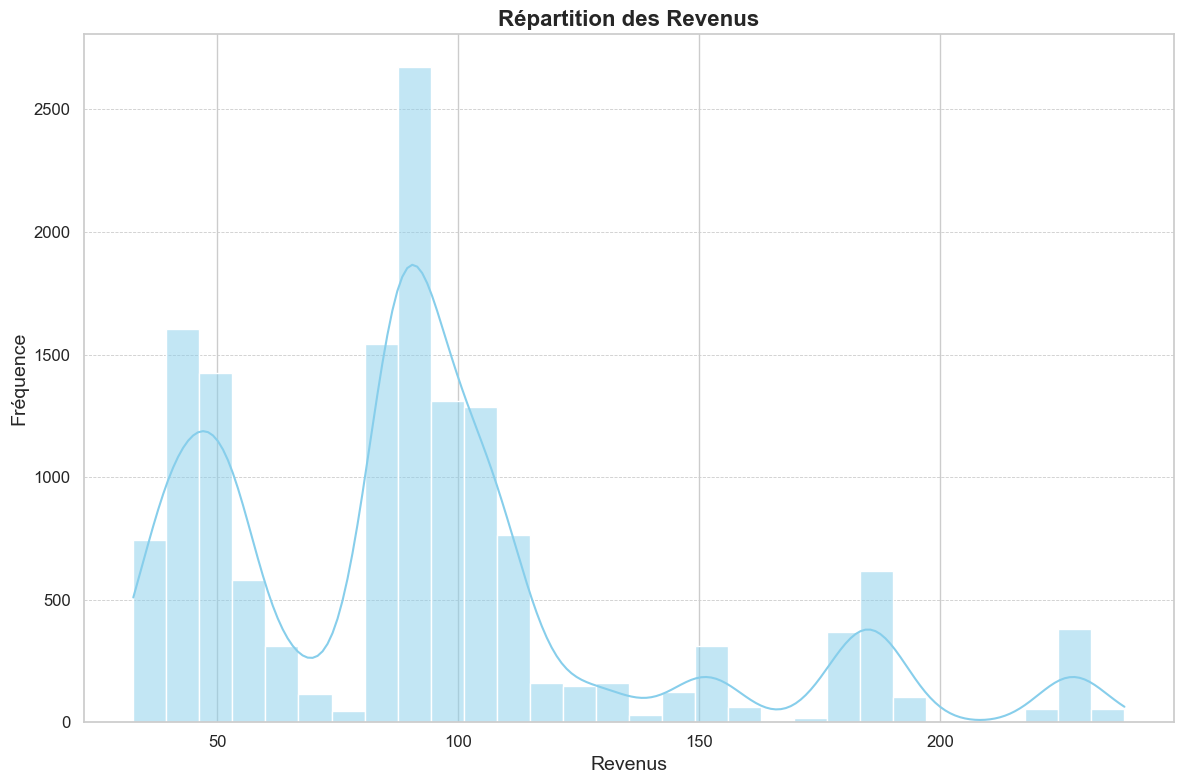

In [23]:
# Créer l'histogramme
plt.figure(figsize=(12, 8))
hist_plot = sns.histplot(data['revenue'], bins=30, kde=True, color='skyblue')

# Ajouter le titre et les labels avec polices améliorées
plt.title('Répartition des Revenus', fontsize=16, weight='bold')
plt.xlabel('Revenus', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Ajouter des ticks améliorés
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les bordures et la grille
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
#plt.savefig('1.png')
plt.show()

Plage de revenus : Les revenus représentés s'étalent de 0 à environ 2400, avec la majorité se concentrant dans la tranche inférieure à 200.
Asymétrie de la distribution : La distribution n'est pas symétrique, avec une queue plus étalée vers les valeurs élevées de revenus, montrant que certaines observations ont des revenus beaucoup plus importants que la moyenne.

Valeurs extrêmes : On note quelques valeurs de revenus très élevées, au-delà de 2000, qui peuvent être considérées comme des valeurs aberrantes potentiellement influentes sur la moyenne.

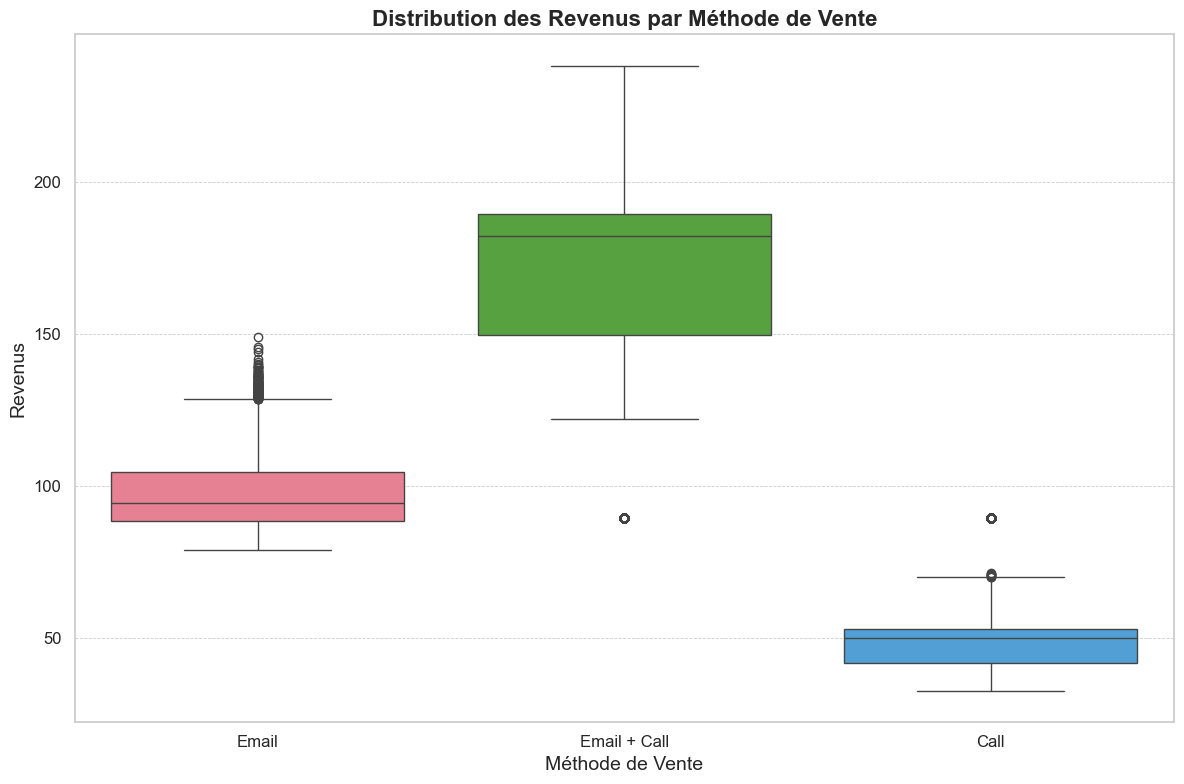

In [24]:
# Créer le box plot
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='sales_method', y='revenue', hue='sales_method', data=data, palette="husl", dodge=False, legend=False)

# Ajouter le titre et les labels avec polices améliorées
plt.title('Distribution des Revenus par Méthode de Vente', fontsize=16, weight='bold')
plt.xlabel('Méthode de Vente', fontsize=14)
plt.ylabel('Revenus', fontsize=14)

# Ajouter des ticks améliorés
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les bordures et la grille
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
#plt.savefig('2.png')
plt.show()

La combinaison email + appel semble générer des revenus plus élevés en médiane, avec moins de dispersion que la méthode email seule. La méthode appel seule présente des revenus plus faibles et une distribution plus resserrée.

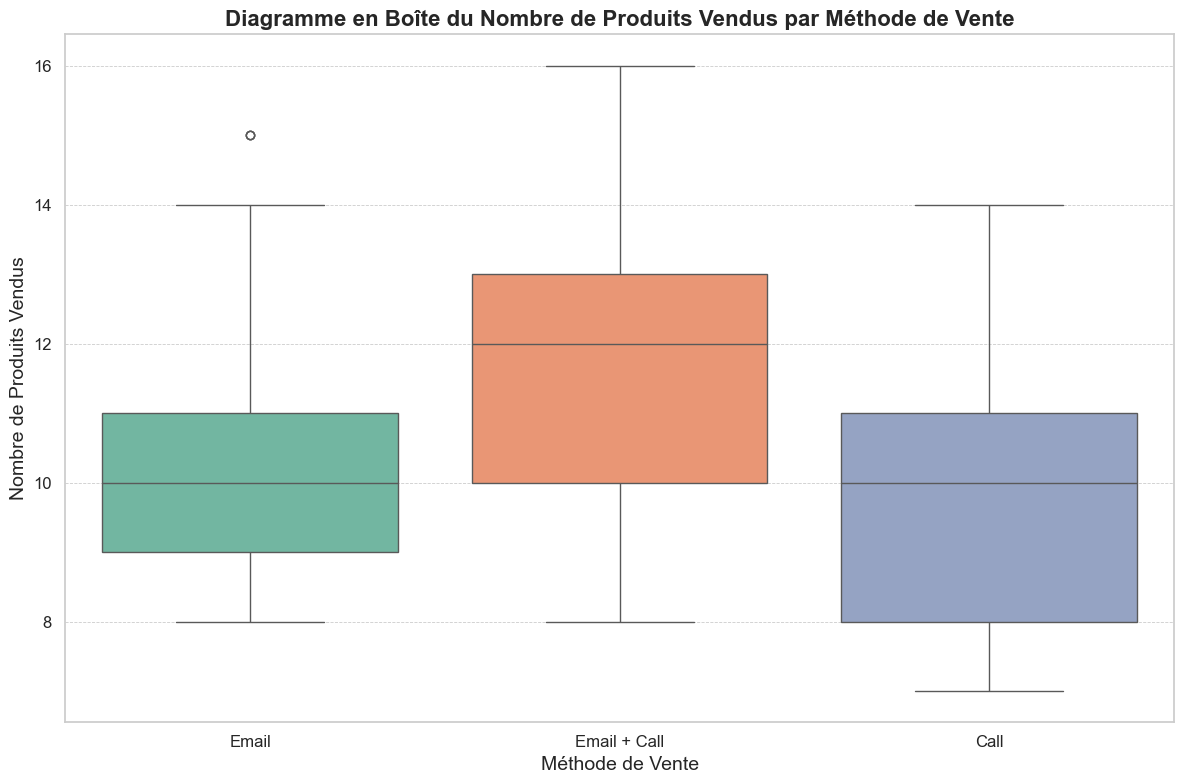

In [25]:
# Créer le box plot
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='sales_method', y='nb_sold', data=data, palette="Set2", hue='sales_method', dodge=False, legend=False)

# Ajouter le titre et les labels avec polices améliorées
plt.title('Diagramme en Boîte du Nombre de Produits Vendus par Méthode de Vente', fontsize=16, weight='bold')
plt.xlabel('Méthode de Vente', fontsize=14)
plt.ylabel('Nombre de Produits Vendus', fontsize=14)

# Ajouter des ticks améliorés
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les bordures et la grille
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
#plt.savefig('3.png')
plt.show()

<Figure size 1400x1000 with 0 Axes>

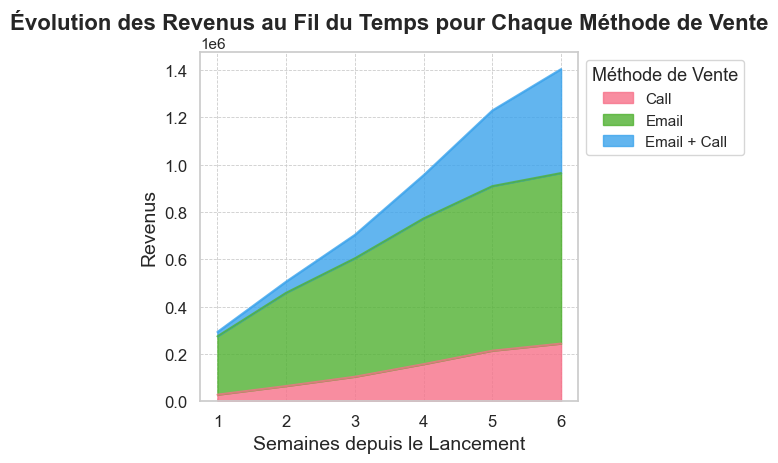

In [26]:

# Utiliser pivot_table au lieu de pivot
data_pivot = data.pivot_table(index='week', columns='sales_method', values='revenue', aggfunc='sum')

# Calculer les valeurs cumulées pour chaque semaine
data_cumsum = data_pivot.cumsum()

# Création d'une palette de couleurs personnalisée
colors = sns.color_palette("husl", len(data_cumsum.columns))

# Créer le graphique en aires
plt.figure(figsize=(14, 10))
data_cumsum.plot.area(alpha=0.8, color=colors)

# Ajouter le titre et les labels avec polices améliorées
plt.title('Évolution des Revenus au Fil du Temps pour Chaque Méthode de Vente', fontsize=16, weight='bold')
plt.xlabel('Semaines depuis le Lancement', fontsize=14)
plt.ylabel('Revenus', fontsize=14)

# Ajouter une légende améliorée
plt.legend(title='Méthode de Vente', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Ajouter des ticks améliorés
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les bordures et la grille
plt.grid(True, linestyle='--', linewidth=0.6)

# plt.savefig('3.png')
# Afficher le graphique
plt.tight_layout()
plt.show()


1. Évolution des revenus par méthode de vente :
   - Le graphique montre l'évolution des revenus cumulés au fil du temps (en semaines) pour trois méthodes de vente différentes : "Call", "Email" et "Email + Call".
   - Chaque méthode de vente est représentée par une zone de couleur différente qui s'élargit au fil des semaines, indiquant une augmentation des revenus.

2. Performances relatives des méthodes de vente :
   - On peut observer que la méthode "Email + Call" génère les revenus les plus élevés, suivie de la méthode "Email" et enfin de la méthode "Call".
   - Cette hiérarchie se maintient tout au long de la période représentée, indiquant que la combinaison d'email et d'appel téléphonique est la plus performante en termes de génération de revenus.

3. Tendances d'évolution :
   - Chaque méthode de vente montre une courbe de croissance des revenus cumulés qui s'accélère avec le temps.
   - Cela suggère que les différentes méthodes de vente gagnent en efficacité et en impact au fil des semaines suivant le lancement du produit.

4. Interprétation globale :
   - Ce graphique permet de visualiser clairement les performances relatives des différentes méthodes de vente utilisées et leur évolution dans le temps.
   


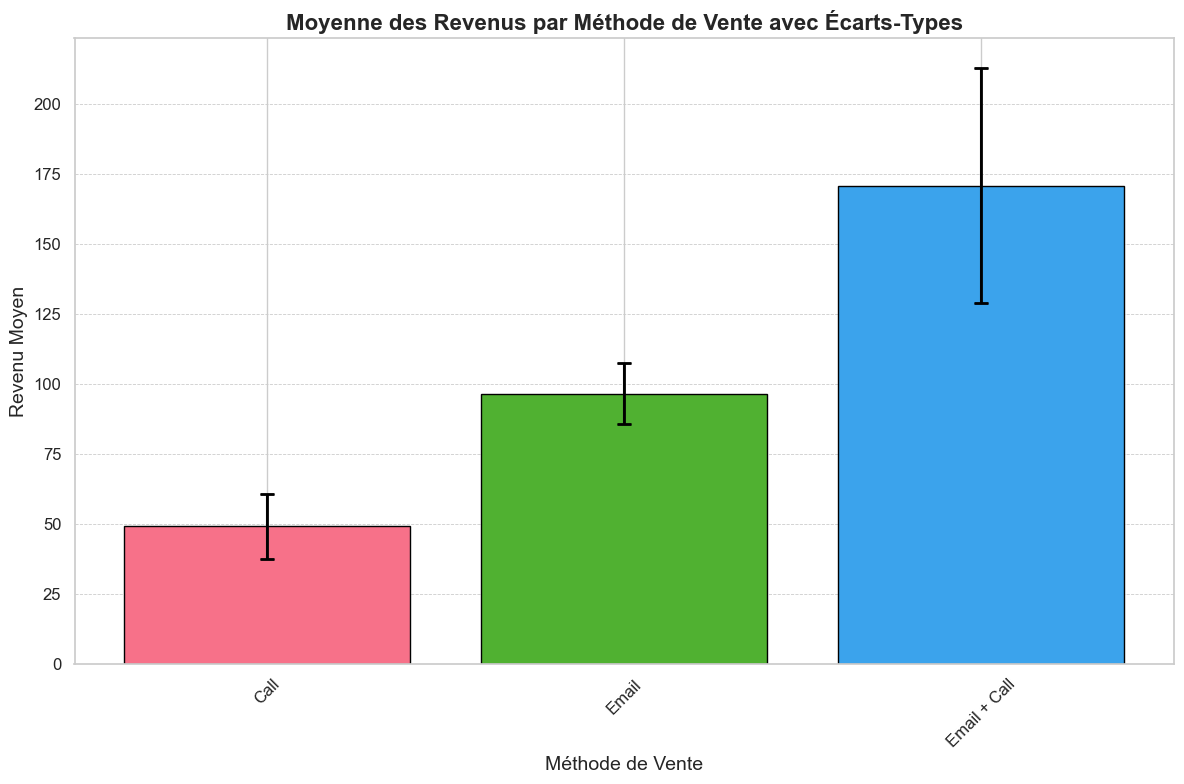

In [27]:
# Calculer les moyennes et les écarts-types des revenus par méthode de vente
revenue_stats = data.groupby('sales_method')['revenue'].agg(['mean', 'std']).reset_index()
revenue_stats.columns = ['sales_method', 'mean', 'std']

# Configuration des styles de Seaborn
sns.set(style="whitegrid")

# Créer le graphique à barres avec barres d'erreur
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(revenue_stats['sales_method'], revenue_stats['mean'], yerr=revenue_stats['std'], capsize=5, color=sns.color_palette("husl", n_colors=len(revenue_stats['sales_method'])), edgecolor='black')

# Ajouter le titre et les labels avec polices améliorées
plt.title('Moyenne des Revenus par Méthode de Vente avec Écarts-Types', fontsize=16, weight='bold')
plt.xlabel('Méthode de Vente', fontsize=14)
plt.ylabel('Revenu Moyen', fontsize=14)

# Ajouter des ticks améliorés
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les barres d'erreur
plt.errorbar(revenue_stats['sales_method'], revenue_stats['mean'], yerr=revenue_stats['std'], fmt='none', color='black', capsize=5, capthick=2, elinewidth=2)

# Ajouter une grille subtile
plt.grid(axis='y', linestyle='--', linewidth=0.6)

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
# plt.savefig('4.png')
plt.show()

### Observations

1. **Revenus Moyens** :
   - **Call** : La méthode Call a la moyenne des revenus la plus basse (49.13).
   - **Email** : La méthode Email a une moyenne des revenus plus élevée (96.57) que la méthode Call.
   - **Email + Call** : La méthode combinée Email + Call a la moyenne des revenus la plus élevée (170.88).

2. **Variabilité des Revenus** :
   - **Call** : L'écart-type des revenus pour la méthode Call est de 11.54, ce qui montre une certaine variabilité mais reste relativement faible.
   - **Email** : L'écart-type des revenus pour la méthode Email est de 10.98, indiquant une variabilité similaire à celle de la méthode Call.
   - **Email + Call** : L'écart-type pour la méthode combinée Email + Call est de 42.08, ce qui est beaucoup plus élevé que pour les autres méthodes, indiquant une grande variabilité des revenus générés par cette méthode.


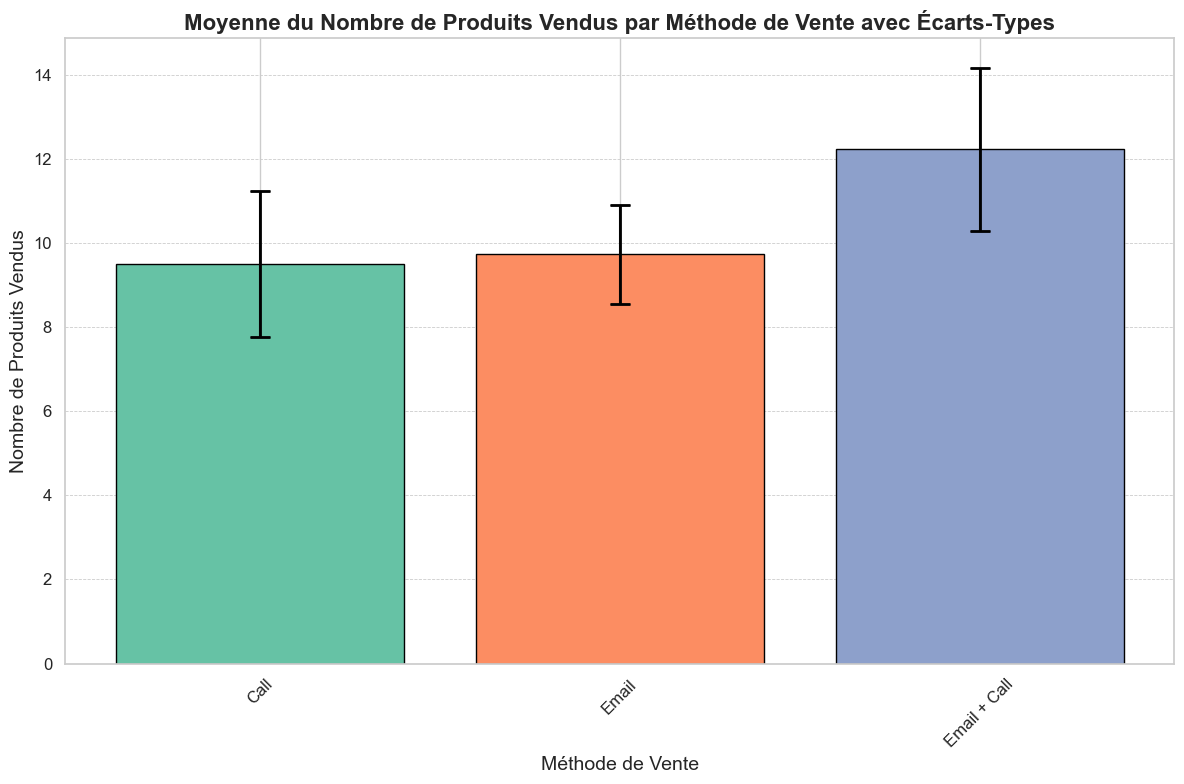

In [28]:
# Calculer les moyennes et les écarts-types du nombre de produits vendus par méthode de vente
revenue_stats = data.groupby('sales_method')['nb_sold'].agg(['mean', 'std']).reset_index()
revenue_stats.columns = ['sales_method', 'mean', 'std']

# Configuration des styles de Seaborn
sns.set(style="whitegrid")

# Créer le graphique à barres avec barres d'erreur
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(revenue_stats['sales_method'], revenue_stats['mean'], yerr=revenue_stats['std'], capsize=7, color=sns.color_palette("Set2", n_colors=len(revenue_stats['sales_method'])), edgecolor='black')

# Ajouter le titre et les labels avec polices améliorées
plt.title('Moyenne du Nombre de Produits Vendus par Méthode de Vente avec Écarts-Types', fontsize=16, weight='bold')
plt.xlabel('Méthode de Vente', fontsize=14)
plt.ylabel('Nombre de Produits Vendus', fontsize=14)

# Ajouter des ticks améliorés
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Améliorer les barres d'erreur
plt.errorbar(revenue_stats['sales_method'], revenue_stats['mean'], yerr=revenue_stats['std'], fmt='none', color='black', capsize=7, capthick=2, elinewidth=2)

# Ajouter une grille subtile
plt.grid(axis='y', linestyle='--', linewidth=0.6)

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
# plt.savefig('5.png')
plt.show()

### Observations

1. **Produits Vendus Moyens** :
   - **Call** : La méthode Call a une moyenne des produits vendus de 9.51.
   - **Email** : La méthode Email a une moyenne des produits vendus légèrement plus élevée, de 9.73.
   - **Email + Call** : La méthode combinée Email + Call a la moyenne des produits vendus la plus élevée, de 12.23.

2. **Variabilité des Produits Vendus** :
   - **Call** : L'écart-type des produits vendus pour la méthode Call est de 1.73, montrant une certaine variabilité mais qui reste modérée.
   - **Email** : L'écart-type des produits vendus pour la méthode Email est de 1.18, ce qui est relativement faible et indique une faible variabilité.
   - **Email + Call** : L'écart-type pour la méthode combinée Email + Call est de 1.93, ce qui est légèrement plus élevé que pour les autres méthodes, indiquant une plus grande variabilité.


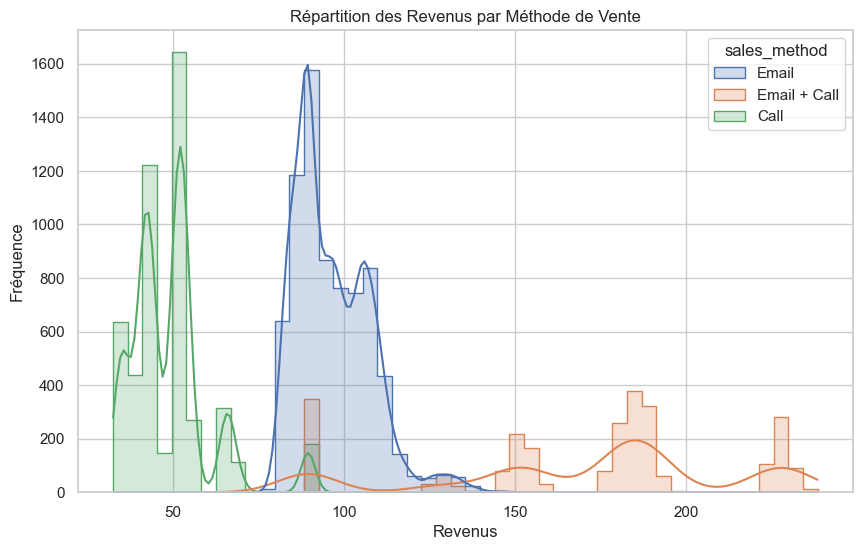

In [29]:
# Visualiser la répartition des revenus pour chaque méthode de vente avec des histogrammes
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='revenue', hue='sales_method', element='step', kde=True)
plt.title('Répartition des Revenus par Méthode de Vente')
plt.xlabel('Revenus')
plt.ylabel('Fréquence')

plt.savefig('2.png')
plt.show()


La méthode "email + call" semble générer les revenus les plus élevés, avec une concentration plus importante autour des valeurs les plus hautes. La méthode email seule présente une distribution plus étalée, tandis que la méthode appel seule est celle qui génère les revenus les plus faibles.

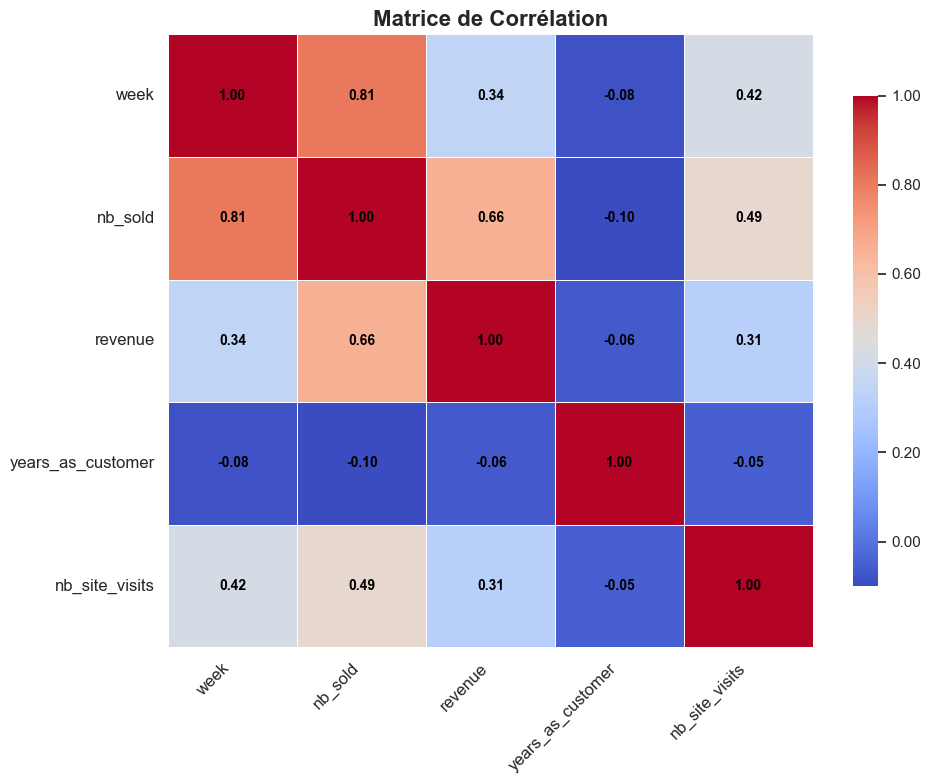

In [30]:
# Assurez-vous que seules les colonnes numériques sont utilisées pour la corrélation
numeric_data = data.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr = numeric_data.corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))

# Utiliser une palette de couleurs plus agréable
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Créer la heatmap
heatmap = sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    linewidths=.5,
    fmt='.2f',  # Format des annotations
    annot_kws={"size": 10, "weight": 'bold', "color": 'black'},  # Style des annotations
    cbar_kws={"shrink": .8, "format": "%.2f"}  # Style de la barre de couleur
)

# Ajouter un titre et améliorer les labels
plt.title('Matrice de Corrélation', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotation des labels des axes X
plt.yticks(rotation=0, fontsize=12)  # Rotation des labels des axes Y

# Ajouter une grille plus fine
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajuster le layout
plt.tight_layout()

# Sauvegarder et afficher le graphique
# 
plt.savefig('correlation_heatmap.png')
plt.show()

# 4 Les tests statistique

# Analyse de la Variance (ANOVA)
Pour comparer les moyennes des revenus générés par chaque méthode de vente, utilisons ANOVA unidirectionnelle.

In [31]:


# ANOVA unidirectionnelle
model = ols('revenue ~ C(sales_method)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table)


ANOVA Table:
                       sum_sq       df             F  PR(>F)
C(sales_method)  2.523737e+07      2.0  30952.595289     0.0
Residual         6.113129e+06  14995.0           NaN     NaN


Les résultats de l'ANOVA montrent qu'il existe des différences significatives entre les revenus générés par les différentes méthodes de vente (Email, Call, Email + Call). Ces différences ne sont pas dues au hasard mais sont attribuables aux méthodes de vente utilisées.

### Prochaines Étapes

Étant donné que l'ANOVA a identifié des différences significatives globales entre les groupes, nous pouvons maintenant effectuer des tests post-hoc de Tukey pour identifier quelles paires de méthodes de vente présentent des différences significatives.



# Tests Post-hoc de Tukey
Après avoir identifié une différence significative avec ANOVA, utilisons les tests post-hoc de Tukey pour comparer les paires de groupes.

In [32]:
import statsmodels.stats.multicomp as mc

# Test post-hoc de Tukey
comp = mc.MultiComparison(data['revenue'], data['sales_method'])
post_hoc_res = comp.tukeyhsd()

print("Tests post-hoc de Tukey:")
print(post_hoc_res)


Tests post-hoc de Tukey:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  Call        Email  47.4461   0.0  46.5792   48.313   True
  Call Email + Call   121.75   0.0 120.6001 122.8999   True
 Email Email + Call  74.3038   0.0  73.2218  75.3859   True
-----------------------------------------------------------


Les tests post-hoc de Tukey révèlent que toutes les paires de méthodes de vente (Call, Email, Email + Call) présentent des différences significatives en termes de revenus générés. En particulier, la méthode "Email + Call" génère des revenus significativement plus élevés que les méthodes "Call" et "Email" prises séparément. De même, la méthode "Email" génère des revenus significativement plus élevés que la méthode "Call".

### Prochaines Étapes

Pour compléter l'analyse, il serait utile de visualiser les différences moyennes et leurs intervalles de confiance pour une meilleure interprétation des résultats. 

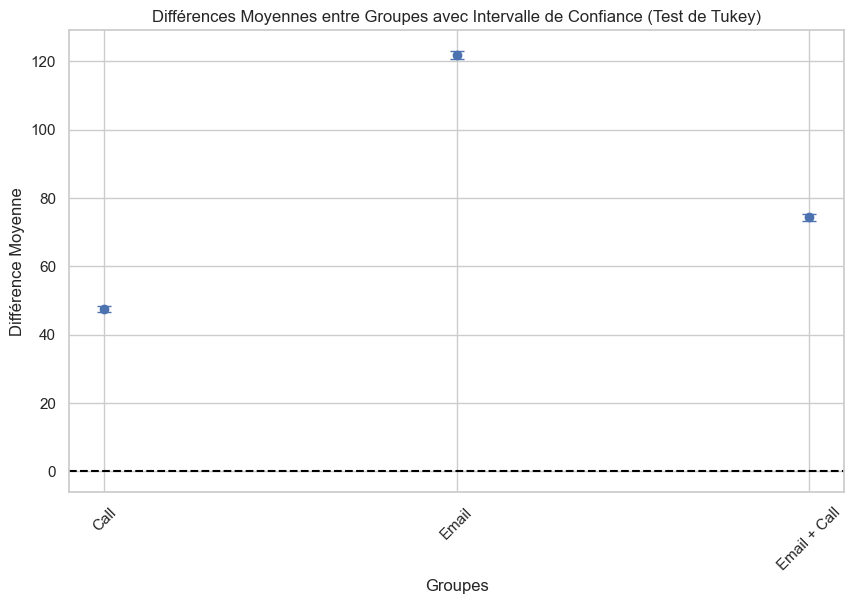

In [33]:

# Données à partir du test post-hoc de Tukey
group_names = post_hoc_res.groupsunique
meandiffs = post_hoc_res.meandiffs
lower = post_hoc_res.confint[:, 0]
upper = post_hoc_res.confint[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

plt.errorbar(group_names, meandiffs, yerr=[upper - meandiffs, meandiffs - lower], fmt='o', capsize=5, elinewidth=2)

plt.axhline(y=0, color='black', linestyle='--')  # Ligne pour la différence nulle

plt.title('Différences Moyennes entre Groupes avec Intervalle de Confiance (Test de Tukey)')
plt.xlabel('Groupes')
plt.ylabel('Différence Moyenne')
plt.grid(True)
plt.xticks(rotation=45)
# plt.savefig('10.png')
plt.show()


En résumé, le graphique confirme que les trois méthodes de vente présentent des différences significatives en termes de revenus générés, avec "Email + Call" obtenant les meilleurs résultats, suivie de "Email" puis "Call".


### test de régression linéaire

In [34]:
# Spécification du modèle
X = data[['nb_site_visits', 'years_as_customer']]
X = sm.add_constant(X)  # Ajout de l'intercept
y = data['revenue']

# Ajustement du modèle
model = sm.OLS(y, X).fit()

# Affichage des résultats
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     813.3
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:37:09   Log-Likelihood:                -77839.
No. Observations:               14998   AIC:                         1.557e+05
Df Residuals:                   14995   BIC:                         1.557e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4417      2.60

Selon ce modèle, la fréquence des visites sur le site web et l'ancienneté des clients ont des effets significatifs sur les revenus générés. Les résultats indiquent que plus la fréquence des visites est élevée, plus les revenus sont élevés, tandis que l'ancienneté des clients est associée à des revenus plus faibles avec le temps.